In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Import dataset
df=pd.read_excel(r"C:\Users\hp\Downloads\Assessment_Data.xlsx")
#df

In [3]:
#Clean Dataset
#convert Date to Datetime formart

df['Date created'] = pd.to_datetime(df['Date created'])
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'])

In [4]:
#Dealing with missing values

df.dropna(subset=['Date created','Delivery Time'], inplace=True)

In [5]:
#Calculate lead time
#define the function to calculate lead time with the given condtion.

def lead_time(row):
    if row['Date created'].hour >= 16 and row['Delivery Time'].date() > row['Date created'].date():
        created_time = row['Date created'].replace(hour=8, minute=0, second=0) + pd.DateOffset(days=1)
    else:
        created_time = row['Date created']
    lead_time = row['Delivery Time'] - created_time
    return lead_time
#apply the function and remove rows with negative lead times
#convert lead times to hours
df['Lead Time'] = df.apply(lead_time, axis=1)
df =df[df['Lead Time'] >= pd.Timedelta(0)]
df['Lead Time (hours)'] = df['Lead Time'].dt.total_seconds() /3600

In [6]:
# Display the first few rows of updated dataframe

df.head()

,HMO ID,Prescription Code,Name,Date created,STATUS,Delivery Status,Delivery Time,Remark,Lead Time,Lead Time (hours)
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00,NaN,0 days 11:35:59,11.599722
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00,NaN,0 days 06:53:57,6.899167
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00,"Enrollee number not connecting, reroute 2nd",1 days 09:40:26,33.673889
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00,NaN,0 days 05:03:12,5.053333
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00,NaN,0 days 07:25:50,7.430556


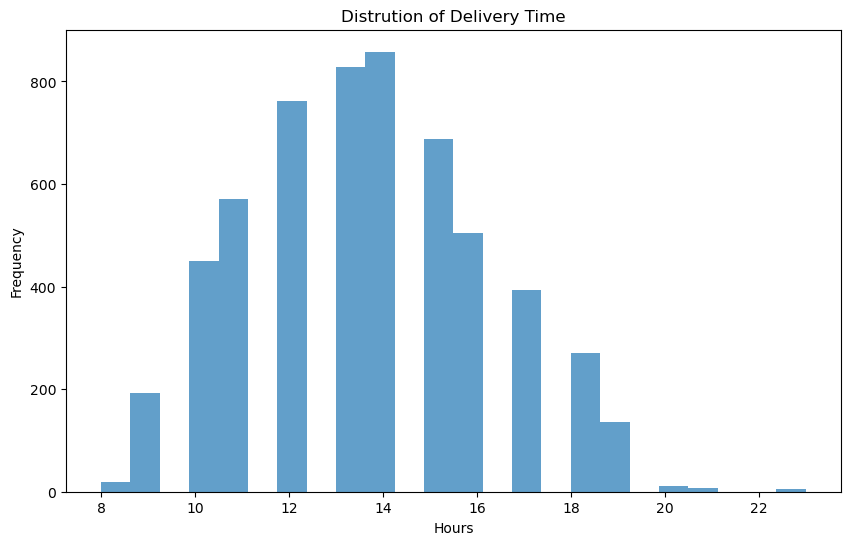

In [7]:
#Descriptive Analysis- discription plots
#Plot distribution for delivery times
plt.figure(figsize=(10,6))
plt.hist(df['Delivery Time'].dt.hour, bins=24, alpha=0.7)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distrution of Delivery Time')
plt.show()

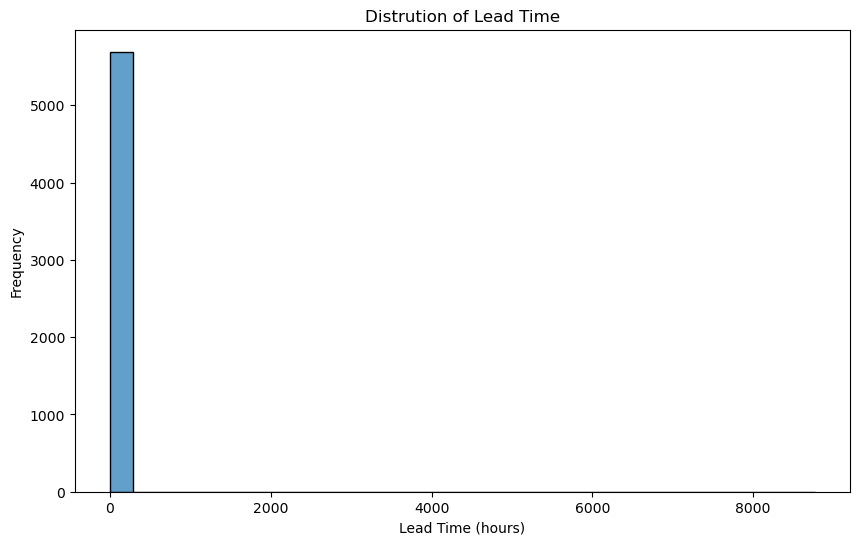

In [8]:
#Plot distribution for lead times
plt.figure(figsize=(10,6))
sns.histplot(df['Lead Time (hours)'], bins=30, alpha=0.7)
plt.xlabel('Lead Time (hours)')
plt.ylabel('Frequency')
plt.title('Distrution of Lead Time')
plt.show()

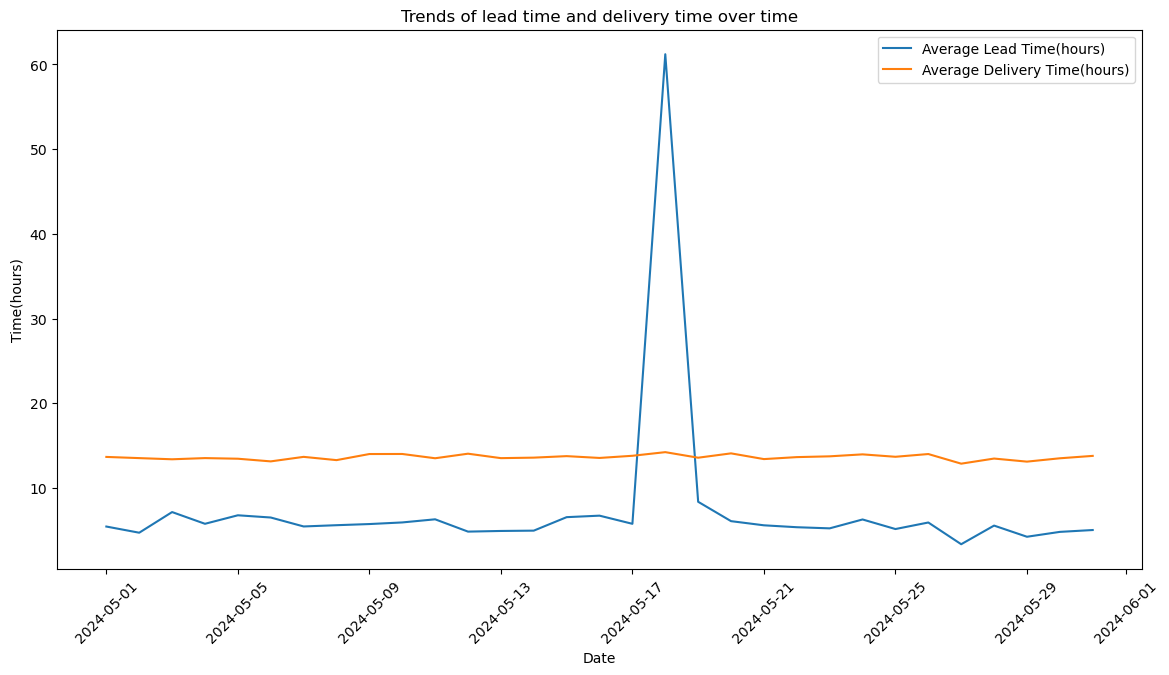

In [9]:
#Trend analysis summary
#Create time series plots for delivery times and lead times

#extract date from datetime for grouping
df['Date'] = df['Date created'].dt.date

#Calculate average lead time per day
avg_lead_time_per_day = df.groupby('Date')['Lead Time (hours)'].mean()

#Calculate average delivery time per day
df['Delivery Hour'] = df['Delivery Time'].dt.hour
avg_delivery_time_per_day = df.groupby('Date')['Delivery Hour'].mean()


plt.figure(figsize=(14,7))
plt.plot(avg_lead_time_per_day.index, avg_lead_time_per_day.values, label='Average Lead Time(hours)')
plt.plot(avg_delivery_time_per_day.index, avg_delivery_time_per_day.values, label='Average Delivery Time(hours)')
plt.xlabel('Date')
plt.ylabel('Time(hours)')
plt.title('Trends of lead time and delivery time over time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [10]:
#Performance Metrics
# Calculate the average delivery time and lead time

average_delivery_time = df['Delivery Time'].mean()
average_lead_time = df['Lead Time (hours)'].mean()

print("Average Delivery Time:", average_delivery_time)
print("Average Lead Time:", average_lead_time)


Average Delivery Time: 2024-05-17 14:07:53.710272256
Average Lead Time: 7.195553067993366


In [11]:
# Calculate the proportion of prescriptions delivered on time vs late
# Define on-time delivery conditions based on SLA
def is_on_time(row):
    if row['Date created'].hour <= 15:
        return row['Delivery Time'].date() == row['Date created'].date()
    else:
        return row['Delivery Time'] <= (row['Date created'] + pd.Timedelta(days=1)).replace(hour=12, minute=0, second=0)

df['On Time'] = df.apply(is_on_time, axis=1)
on_time_proportion = df['On Time'].mean()

# Display the performance metrics
average_delivery_time, average_lead_time, on_time_proportion

(Timestamp('2024-05-17 14:07:53.710272256'),
 7.195553067993366,
 0.764179104477612)

(array([19844., 19848., 19852., 19856., 19860., 19864., 19868., 19872.,
        19875.]),
 [Text(19844.0, 0, '2024-05-01'),
  Text(19848.0, 0, '2024-05-05'),
  Text(19852.0, 0, '2024-05-09'),
  Text(19856.0, 0, '2024-05-13'),
  Text(19860.0, 0, '2024-05-17'),
  Text(19864.0, 0, '2024-05-21'),
  Text(19868.0, 0, '2024-05-25'),
  Text(19872.0, 0, '2024-05-29'),
  Text(19875.0, 0, '2024-06-01')])

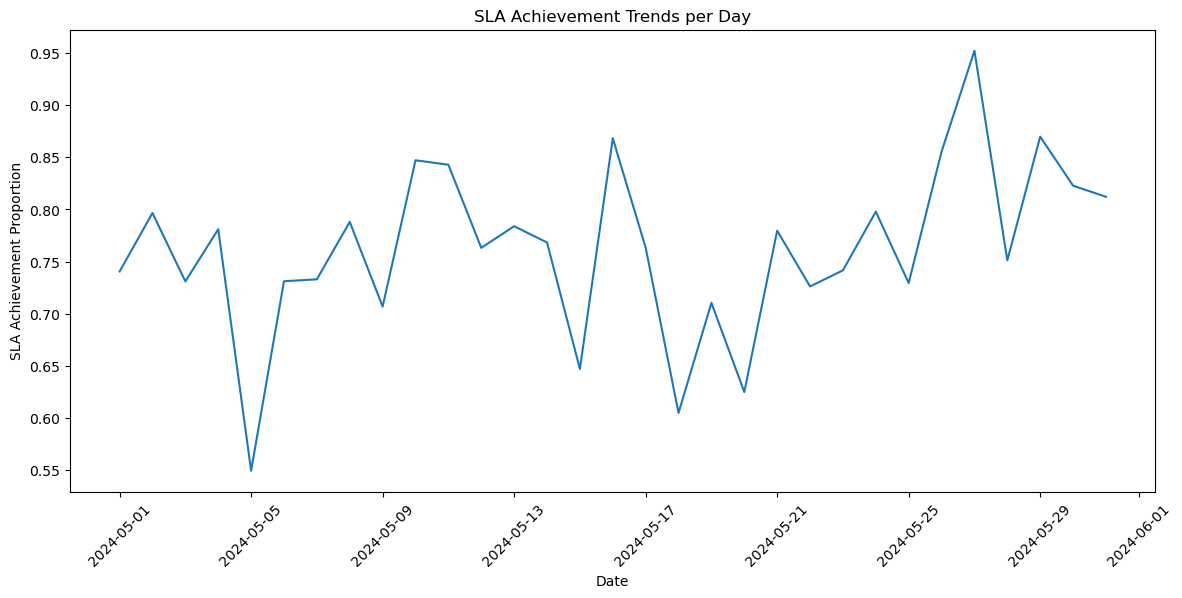

In [12]:
# SLA Compliance Analysis
# Define SLA conditions
def sla_achieved(row):
    if row['Date created'].hour <= 15:
        return row['Delivery Time'].date() == row['Date created'].date()
    else:
        return row['Delivery Time'] <= (row['Date created'] + pd.Timedelta(days=1)).replace(hour=12, minute=0, second=0)

# Calculate SLA achievement
df['SLA Achieved'] = df.apply(sla_achieved, axis=1)
sla_achievement_proportion = df['SLA Achieved'].mean()

# Trend analysis of SLA achievement per day
sla_achievement_trend = df.groupby('Date')['SLA Achieved'].mean()

# SLA Achievement Trends per Day
plt.figure(figsize=(14, 6))
plt.plot(sla_achievement_trend)
plt.title('SLA Achievement Trends per Day')
plt.xlabel('Date')
plt.ylabel('SLA Achievement Proportion')
plt.xticks(rotation=45)



In [13]:
# Calculate actual vs target lead times
target_lead_time = 4 # hours
actual_vs_target_lead_time = df['Lead Time (hours)'].mean() - target_lead_time

print(actual_vs_target_lead_time)

# Display SLA compliance metrics
sla_achievement_proportion, actual_vs_target_lead_time



3.195553067993366


(0.764179104477612, 3.195553067993366)

In [14]:
#Export Cleaned Data
cleaned_data_file_path = 'C:/Users/hp/Documents/cleaned_assessment_data.xlsx'
df.to_excel(cleaned_data_file_path, index= False)

print(f"cleaned data exported to {cleaned_data_file_path}")

cleaned data exported to C:/Users/hp/Documents/cleaned_assessment_data.xlsx
